# Import all necessary packages

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None

# Read data, missing values, Shape

In [2]:
data=pd.read_excel('Credit.xlsx')
data.head()
data.tail()
data.info()
data.shape
data.describe()
data.isna().sum()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,18.701,5524,415,5,64,7,Female,No,No,Asian,966


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


(400, 11)

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

# Creating Pivot for the Features and Rating

In [3]:
data_pivot=pd.pivot_table(data,values=['Income','Limit','Cards','Age','Education','Gender','Student','Married','Ethnicity','Balance'],index='Rating',aggfunc=np.median)
data_pivot.head()
data_pivot.shape
data[['Income','Limit','Cards','Age','Education','Gender','Student','Married','Ethnicity','Balance','Rating']].nunique()

,Age,Balance,Cards,Education,Income,Limit
Rating,,,,,,
93,38.0,0.0,1.0,16.0,15.717,905.0
103,36.0,0.0,2.0,11.0,15.602,906.0
112,70.0,0.0,3.0,14.0,13.433,1134.0
115,74.0,0.0,2.0,15.0,16.819,1337.0
117,77.0,0.0,3.0,14.0,11.808,1300.0


(283, 6)

Income       399
Limit        387
Cards          9
Age           68
Education     16
Gender         2
Student        2
Married        2
Ethnicity      3
Balance      284
Rating       283
dtype: int64

from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(data_pivot)
data_scld=pd.DataFrame(arr_scld, columns=data_pivot.columns)
data_scld.head()
data_scld.describe()
data_scld.shape
import warnings
warnings.filterwarnings('ignore')

# Creating Heatmap to understand the correlation

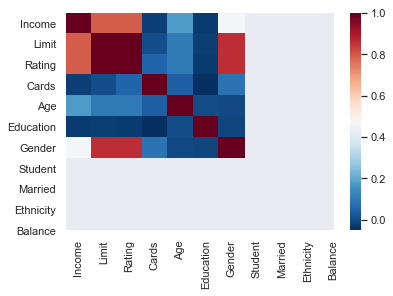

In [4]:
sns.heatmap(data.corr(),
            xticklabels=data.columns,
            yticklabels=data.columns
           ,cmap='RdBu_r')

# Scatter Plot - identified strong correlation between Income, Limit,balance, rating

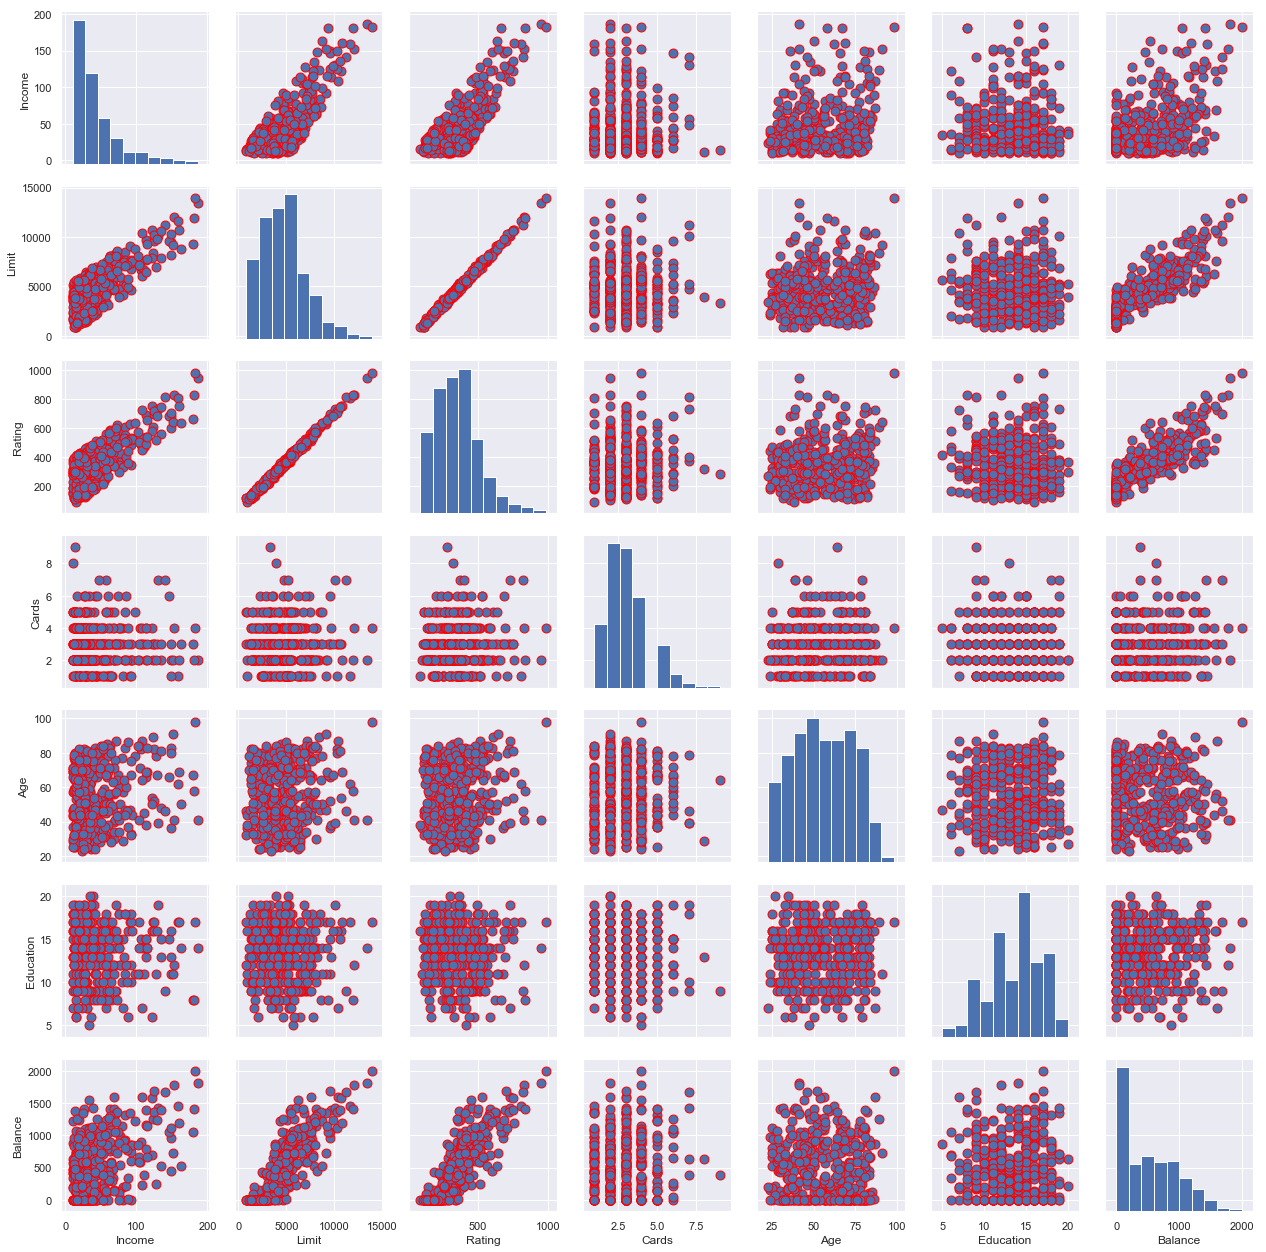

In [5]:
sns.pairplot(data,kind="scatter", plot_kws=dict(s=80, edgecolor="red", linewidth=1))
plt.show()

# Usage of Minmax scaler from sklearn to standarize the features

In [17]:
from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(data_pivot)
data_scld=pd.DataFrame(arr_scld, columns=data_pivot.columns)
data_scld.head()
data_scld.describe()
data_scld.shape
import warnings
warnings.filterwarnings('ignore')

,Age,Balance,Cards,Education,Income,Limit
0,0.189189,0.0,0.000000,0.769231,0.030374,0.003829
1,0.162162,0.0,0.153846,0.384615,0.029721,0.003906
2,0.621622,0.0,0.307692,0.615385,0.017416,0.021366
3,0.675676,0.0,0.153846,0.692308,0.036625,0.036912
4,0.716216,0.0,0.307692,0.615385,0.008198,0.034079


,Age,Balance,Cards,Education,Income,Limit
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.429281,0.273913,0.303887,0.571623,0.219000,0.312691
std,0.214215,0.238984,0.193656,0.218265,0.216900,0.193614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.270270,0.047149,0.153846,0.384615,0.069237,0.166794
50%,0.418919,0.248374,0.307692,0.615385,0.136818,0.300276
75%,0.608108,0.453227,0.461538,0.769231,0.293027,0.426099
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(283, 6)

# Box plot to see the outliers

Text(0.5, 1.0, 'darkgrid')

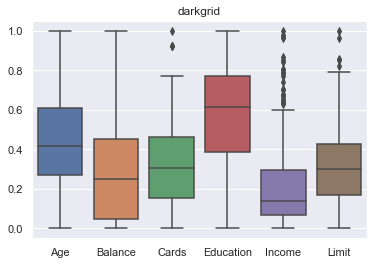

In [18]:
sns.set_style("darkgrid")
sns.boxplot(data=data_scld);
plt.title("darkgrid")

# Display of Q1, Q3 values from Outliers

In [19]:
cols = list(data_scld)
irq_score = {}

for c in cols:
    q1 = data_scld[c].quantile(0.25)
    q3 = data_scld[c].quantile(0.75)
    score = q3 - q1
    outliers = data_scld[(data_scld[c] < q1 - 1.5 * score) | (data_scld[c] > q3 + 1.5 * score)][c]
    values = data_scld[(data_scld[c] >= q1 - 1.5 * score) | (data_scld[c] <= q3 + 1.5 * score)][c]
    
    irq_score[c] = {
        "Q1": q1,
        "Q3": q3,
        "IRQ": score,
        "n_outliers": outliers.count(),
        "outliers_avg": outliers.mean(),
        "outliers_stdev": outliers.std(),
        "outliers_median": outliers.median(),
        "values_avg:": values.mean(),
        "values_stdev": values.std(),
        "values_median": values.median(),
    }
    
irq_score = pd.DataFrame.from_dict(irq_score, orient='index')

irq_score

,Q1,Q3,IRQ,n_outliers,outliers_avg,outliers_stdev,outliers_median,values_avg:,values_stdev,values_median
Age,0.270270,0.608108,0.337838,0,NaN,NaN,NaN,0.429281,0.214215,0.418919
Balance,0.047149,0.453227,0.406078,0,NaN,NaN,NaN,0.273913,0.238984,0.248374
Cards,0.153846,0.461538,0.307692,4,0.942308,0.038462,0.923077,0.303887,0.193656,0.307692
Education,0.384615,0.769231,0.384615,0,NaN,NaN,NaN,0.571623,0.218265,0.615385
Income,0.069237,0.293027,0.223790,23,0.773683,0.120200,0.770518,0.219000,0.216900,0.136818
Limit,0.166794,0.426099,0.259305,5,0.898652,0.077488,0.858554,0.312691,0.193614,0.300276


# Display of Scaled data

In [20]:
data_scld
data

,Age,Balance,Cards,Education,Income,Limit
0,0.189189,0.000000,0.000000,0.769231,0.030374,0.003829
1,0.162162,0.000000,0.153846,0.384615,0.029721,0.003906
2,0.621622,0.000000,0.307692,0.615385,0.017416,0.021366
3,0.675676,0.000000,0.153846,0.692308,0.036625,0.036912
4,0.716216,0.000000,0.307692,0.615385,0.008198,0.034079
5,0.108108,0.000000,0.307692,0.461538,0.011635,0.000000
6,0.297297,0.000000,0.615385,0.846154,0.021110,0.000000
7,0.270270,0.000000,0.615385,0.307692,0.017479,0.002374
8,0.189189,0.000000,0.307692,0.615385,0.050275,0.044264
9,0.621622,0.001251,0.307692,0.384615,0.034271,0.030901


,Cluster,Error_Term
0,2,0.414268
1,3,0.339441
2,4,0.291448
3,5,0.259447
4,6,0.232973
5,7,0.213528
6,8,0.199285
7,9,0.184618


In [21]:
n_unique = data.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
Cluster       8
Error_Term    8
dtype: int64


# Clustering using K-Means

In [22]:
from sklearn.cluster import KMeans
num_of_clusters = range(2,10)
error = []

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(data_scld)
    error.append(clusters.inertia_/100)
    
data=pd.DataFrame({'Cluster':num_of_clusters,'Error_Term':error})
data

cluster=KMeans(8)
cluster.fit(data_scld)
clusters.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,Cluster,Error_Term
0,2,0.539586
1,3,0.460986
2,4,0.410656
3,5,0.371006
4,6,0.345738
5,7,0.321592
6,8,0.298810
7,9,0.281072


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([8, 0, 6, 6, 6, 8, 1, 1, 8, 6, 8, 6, 8, 6, 8, 6, 6, 0, 6, 1, 6, 8,
       6, 1, 8, 6, 1, 8, 6, 1, 6, 8, 6, 8, 6, 6, 1, 8, 0, 8, 6, 8, 1, 5,
       8, 8, 8, 0, 8, 8, 1, 5, 1, 8, 1, 6, 6, 8, 8, 0, 0, 8, 5, 8, 8, 1,
       6, 8, 8, 8, 5, 6, 8, 6, 1, 8, 5, 8, 6, 0, 5, 6, 0, 5, 1, 6, 1, 1,
       1, 1, 1, 6, 0, 6, 0, 8, 8, 5, 1, 0, 5, 1, 0, 0, 8, 8, 3, 1, 8, 8,
       8, 5, 0, 8, 6, 0, 8, 0, 6, 0, 5, 1, 3, 1, 6, 5, 5, 0, 8, 8, 5, 1,
       5, 5, 0, 8, 5, 0, 5, 6, 0, 7, 8, 5, 7, 5, 8, 3, 0, 8, 1, 5, 0, 5,
       3, 1, 6, 3, 3, 0, 0, 5, 7, 5, 3, 3, 7, 7, 3, 5, 5, 0, 0, 3, 3, 3,
       7, 1, 5, 7, 0, 3, 3, 7, 7, 7, 3, 7, 3, 3, 3, 3, 2, 3, 3, 7, 7, 0,
       3, 3, 0, 5, 7, 7, 5, 2, 3, 5, 3, 2, 2, 7, 2, 7, 3, 3, 0, 2, 2, 2,
       5, 2, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 2, 3, 3, 7, 3, 5, 2, 2,
       7, 2, 5, 2, 7, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 4, 2, 3, 2, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

# Elbow plot curve for number of clusters and SSE

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'SSE')

Text(0.5, 1.0, 'Find the optimal number of Cluster')

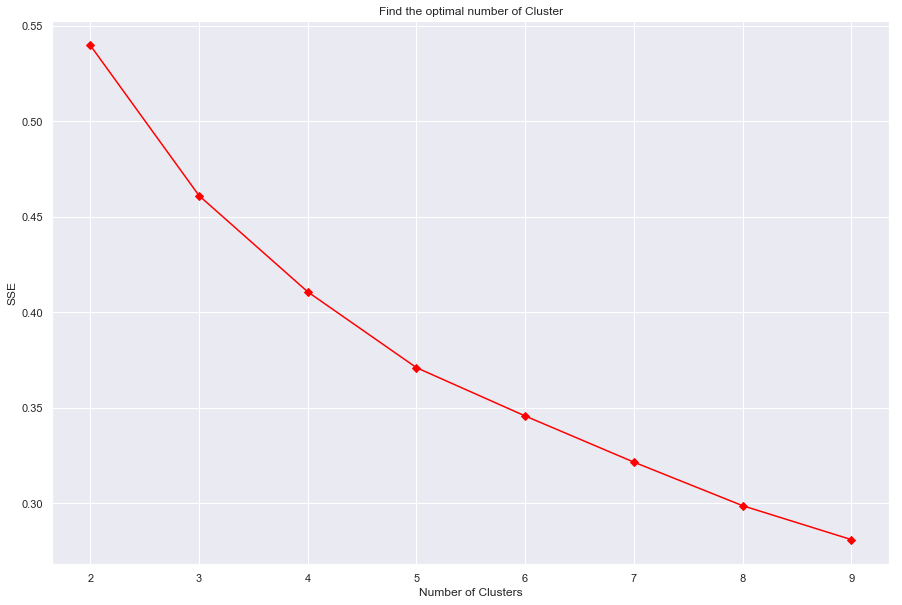

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(data.Cluster,data.Error_Term,marker = "D",color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Find the optimal number of Cluster')
plt.show()

In [14]:
data_scld['cluster']=cluster.labels_
data_scld.head()
data_scld.tail()
data_scld.info()
data_scld.shape

,Balance,Cards,Education,Income,Limit,cluster
0,0.0,0.000000,0.769231,0.030374,0.003829,2
1,0.0,0.153846,0.384615,0.029721,0.003906,6
2,0.0,0.307692,0.615385,0.017416,0.021366,2
3,0.0,0.153846,0.692308,0.036625,0.036912,2
4,0.0,0.307692,0.615385,0.008198,0.034079,2


,Balance,Cards,Education,Income,Limit,cluster
278,0.838919,0.923077,0.230769,0.739254,0.792235,7
279,0.889945,0.461538,0.461538,0.805209,0.858554,3
280,0.702851,0.153846,0.153846,0.966234,0.850896,5
281,0.904952,0.153846,0.615385,1.000000,0.961786,3
282,1.000000,0.461538,0.846154,0.977841,1.000000,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 6 columns):
Balance      283 non-null float64
Cards        283 non-null float64
Education    283 non-null float64
Income       283 non-null float64
Limit        283 non-null float64
cluster      283 non-null int32
dtypes: float64(5), int32(1)
memory usage: 12.2 KB


(283, 6)

# Display of Data based on clusters

In [34]:
clust_profile=pd.pivot_table(data_pivot,values=['Income','Limit','Cards','Age','Education','Balance'],index='cluster',aggfunc=np.mean)
np.round(clust_profile,2)
data_pivot.groupby('cluster').size()

KeyError: 'cluster'

# Clusters are formed, when the balance, cards, education, income and limit is Low , Ratings will be low.